# Machine Learning Project- Classifying Daily and Sports Activities
## Spring 2019


#### Akhil Wadhwa(aw3509)
#### Suyash N Sule(ss11524)

For this Project, we will be using the dataset available at `UCI Machine Learning Repository`. We are trying to best classify the data collected by 3 different types of wearable sensors, namely accelerometers,gyroscopes, and magnetometers used on the torso, arms, and legs. They all are 3 axis devices and hence we have 9 readings for all the 3 sensors in terms of their respective x,y and z axis.



The Link to the repository: 

https://archive.ics.uci.edu/ml/datasets/Daily+and+Sports+Activities

The dataset comprises motion sensor data of `19 daily and sports activities` each performed by `8 subjects` in their own style for `5 minutes`.

Here is the list of 19 activities we are trying to classify:

Sitting (A1)

Standing (A2) 

Lying on back (A3)

Lying on right side (A4) 

Ascending stairs (A5)

Descending stairs (A6),

Standing in an elevator still (A7) 

Moving around in an elevator (A8) 

Walking in a parking lot (A9) 

Walking on a treadmill with a speed of 4 km/h on a flat surface (A10)

Walking on a treadmill with a speed of 4 km/h on 15 deg inclined position (A11) 

Running on a treadmill with a speed of 8 km/h (A12) 

Exercising on a stepper (A13)

Exercising on a cross trainer (A14) 

Cycling on an exercise bike in horizontal position(A15)

Cycling on an exercise bike in vertical A16)

Rowing (A17)

Jumping (A18) 

Playing basketball (A19)

We start by importing the packages required.

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.svm import SVC  
from sklearn.decomposition import PCA
from sklearn import datasets, linear_model,metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix 
import warnings
%matplotlib inline

# Specifying the Features 

In [2]:
warnings.filterwarnings("ignore")
names =[
    'T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro','T_ygyro','T_zgyro','T_xmag', 'T_ymag', 'T_zmag', 
'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro','RA_zgyro','RA_xmag', 'RA_ymag', 'RA_zmag', 
'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro','LA_zgyro','LA_xmag', 'LA_ymag', 'LA_zmag', 
'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro','RL_zgyro','RL_xmag', 'RL_ymag', 'RL_zmag', 
'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro','LL_ygyro','LL_zgyro','LL_xmag', 'LL_ymag', 'LL_zmag'] 

# Reading Data

We read the data which has a total of 45 Features and about 1.14 Million data points in total, spread across 19 activities and 8 persons- 4 Male and 4 Female. Sensor units are calibrated to acquire data at 25 Hz sampling frequency. The 5-min signals are divided into 5-sec segments so that 480(=60*8) signal segments are obtained for each activity. 

Consecutively, we have 60 such readings for each of the eight subjects and 19 such actvities perfomed by each subject.

Since, there is time dependcy the data obtained, we have tried to remove the time dependency by taking the mean of the data which reduced the total data points to 19,000 with 45 features. Also, we have labelled the data with its corresponding activity under the `Activity` column.

In [3]:
data = pd.DataFrame(0,index=np.arange(1000), columns=np.hstack(('Activity', names)))
for k in os.listdir('/Users/akhilwadhwa/Documents/ML Project/data-2'):
    if k.startswith('a'):
        data_a01 =pd.DataFrame(0, index=np.arange(125), columns=names)
        for j in os.listdir('/Users/akhilwadhwa/Documents/ML Project/data-2/'+k):
             if j.startswith('p'):
                data_p1 = pd.DataFrame(0, index=np.arange(125), columns=names)
                for i in os.listdir('/Users/akhilwadhwa/Documents/ML Project/data-2/'+k+'/'+j):
                    if i.endswith('.txt'):
                        data1=pd.read_csv('/Users/akhilwadhwa/Documents/ML Project/data-2/'+k+'/'+j+'/'+i,names=names)
                        data_p1=data_p1+data1
                data_p1=data_p1/60
                data_a01 = pd.concat([data_a01,data_p1],ignore_index=True)       
        data_a01=data_a01[125:]
        data_a01.index=range(1000)
        activity = int(k[-2:])
        data_a01.insert(loc=0,column='Activity',value = activity*np.ones((1000,),dtype=int))
        data = pd.concat([data,data_a01],ignore_index=True)
data=data[1000:]
data.index=range(19000)
print(data)

       Activity     T_xacc    T_yacc    T_zacc   T_xgyro   T_ygyro   T_zgyro  \
0             5   9.265490 -2.587137  1.602612  0.048388 -0.001129  0.007958   
1             5   9.135625 -2.555484  1.543387  0.038899 -0.009704  0.006310   
2             5   9.207300 -2.562700  1.568138  0.035989 -0.026528  0.001492   
3             5   9.314400 -2.583360  1.578389  0.036723 -0.021825 -0.007501   
4             5   9.311393 -2.560653  1.618325  0.026819 -0.007682 -0.021208   
5             5   9.181025 -2.487580  1.639184  0.022431 -0.001407 -0.033515   
6             5   9.156472 -2.490135  1.614985  0.008922  0.005592 -0.042749   
7             5   9.221493 -2.496440  1.641436 -0.005303  0.002588 -0.050120   
8             5   9.341447 -2.495955  1.680894 -0.005287  0.019138 -0.054616   
9             5   9.323080 -2.465126  1.695247  0.002981  0.018807 -0.054983   
10            5   9.327890 -2.456871  1.689008 -0.007530  0.018493 -0.041954   
11            5   9.279855 -2.385833  1.

# Data Extraction

Now the divide the whole data and extract the data frame and the labels vector.

In [4]:
data_only=np.array(data)
data_only.shape
data_only=data_only[:,1:]
print('Data Frame: \n',data_only)
print('Data Frame Dimensions: ',data_only.shape)

Classes_only=np.array(data)[:,0]
print('Class vector: \n',Classes_only)
print('Class Vector Dimensions: ',Classes_only.shape)

Data Frame: 
 [[ 9.26549    -2.58713667  1.60261167 ...  0.515568    0.34074493
  -0.333301  ]
 [ 9.135625   -2.555484    1.54338732 ...  0.51357933  0.34320008
  -0.33434733]
 [ 9.2073     -2.5627      1.56813787 ...  0.51270383  0.345928
  -0.33552867]
 ...
 [ 8.98634992  0.26725417  1.3434135  ...  0.5015255   0.48613767
   0.09286187]
 [ 9.40283553  0.8033728   2.39609485 ...  0.49652217  0.4904655
   0.0984787 ]
 [ 9.80724433  1.21623498  2.2098211  ...  0.494499    0.49561533
   0.09545317]]
Data Frame Dimensions:  (19000, 45)
Class vector: 
 [ 5.  5.  5. ... 12. 12. 12.]
Class Vector Dimensions:  (19000,)


## Scaling the data
Before we perform any operation, we will first scale the data matrix to remove the mean and divide by the variance of the components.

In [5]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaling.fit(data_only)
scaled_data=scaling.transform(data_only)
print(Classes_only)

[ 5.  5.  5. ... 12. 12. 12.]


In [32]:
split=5000
ind = shuffle(np.arange(19000))
tr_ind = ind[:split]
ts_ind = ind[split:]
Xtr = scaled_data[tr_ind]
ytr = Classes_only[tr_ind]
Xts = scaled_data[ts_ind]
yts = Classes_only[ts_ind]

# Logistic Regression

We will start with an important classifier known as `logistic regression`.

We create an object and fit the classifier on the scaled data and print the accuracy.

In [31]:
logreg = linear_model.LogisticRegression(C=1e-1)
logreg.fit(Xtr, ytr)
yhat = logreg.predict(Xts)
acc = np.mean(yhat == yts)
print("Measured Accuracy: ",acc)

Measured Accuracy:  0.9685555555555555


We see that our data performed very well with an accuracy of about `95%`. Now, we print the Confusion Matrix to show which classes showed the errors.

The confusion Martix: 
 [[760   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0 739   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0 758   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0 740   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0 742   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0  44 703   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0 749   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0 696   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   2   0   0   0   0   0   2 729   0   0   0   0   7   0   0   0   1
    0]
 [  0   0   0   0   0   0   0   0   0 702  30  16   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0 110 603   5   0   1   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   7  20  20 676   0   0   0   0   0   1
    1]
 [  

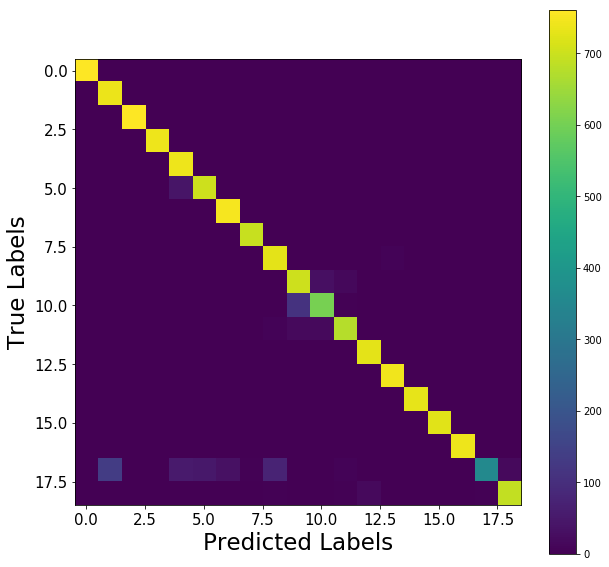

In [8]:
conf = confusion_matrix(yts,yhat) 
print('The confusion Martix: \n',conf) 

plt.figure(figsize=[10,10])
plt.imshow(conf, interpolation='none')
plt.colorbar()
plt.xticks(fontsize=15,fontweight=180)
plt.yticks(fontsize=15,fontweight=180)
plt.xlabel('Predicted Labels',fontsize=23,fontweight=500)
plt.ylabel('True Labels',fontsize=23,fontweight=500)
plt.savefig("Conf_mat_logistic.png",dpi='figure',format='png')

We see that Most errors were found in class 18 and class 10.

## Accuracy vs Regularizer "C"
Now we will vary the value of the regularizer and see how will the accuracy vary with the different values of "C"

In [35]:
C=np.logspace(-4,2,num=7)
accuracy=[]

We run a for loop and append the accuracies found for each value of C.

In [57]:
for i in C:
    logreg = linear_model.LogisticRegression(C=i)
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    acc = np.mean(yhat == yts)
    accuracy.append(acc)
print('Maximum Accuracy: ',np.max(accuracy))

Maximum Accuracy:  0.993


Now, we plot the graph on the log scale.

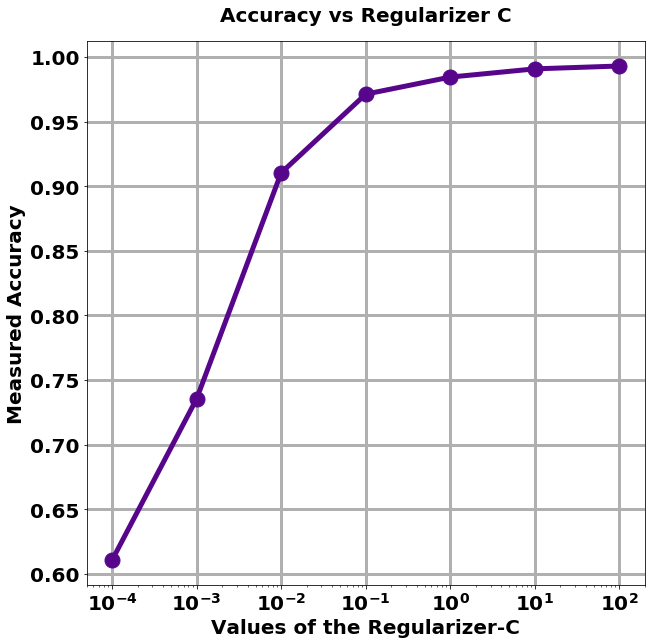

In [38]:
plt.figure(figsize=[10,10])
plt.semilogx(C,accuracy,color='#57068c',marker='o',linewidth=5,markersize=15.0)

plt.xlabel('Values of the Regularizer-C',fontsize=20,fontweight=700)
plt.ylabel('Measured Accuracy',fontsize=20,fontweight=700)
plt.title('Accuracy vs Regularizer C',fontsize=20,fontweight=700,pad=20)
plt.grid(True, linestyle='-', linewidth=3)
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=20,fontweight=1000)
plt.savefig("Acc_vs_c_logistic.png",dpi='figure',format='png')

# Performing PCA for Visualization

Next up, we use Principal Component analysis to visualize the data better.

We make an object for PCA, fit on the scaled data, and print the Singular Values.

In [12]:
nfeatures = np.shape(scaled_data)[1]
pca = PCA(n_components=nfeatures,svd_solver='randomized',whiten=True)
pca.fit(scaled_data)
Z_new = pca.transform(scaled_data)
print('PCA Singular Values: \n',pca.singular_values_)

PCA Singular Values: 
 [392.93551218 348.40960555 274.94475583 215.39370096 195.83892068
 192.21091971 174.76439586 173.31733436 165.12205117 152.22898893
 149.34538967 145.35061109 139.72585629 135.76207762 127.64251889
 125.93582934 120.03294284 117.19544875 115.47555184 113.4393881
 111.3242756  103.46709091  99.41927183  94.75319212  90.98610877
  88.82529235  85.8351269   81.86872898  70.29066278  62.33552813
  58.35287269  55.9118695   54.52150671  47.03953766  42.628967
  39.48007269  36.09089546  32.64102818  30.86568038  30.45229537
  26.90149313  25.01182627  24.16123523  22.06162345  15.33368148]


We now plot the portion of variation(PoV) as a function of the number of PCs. 

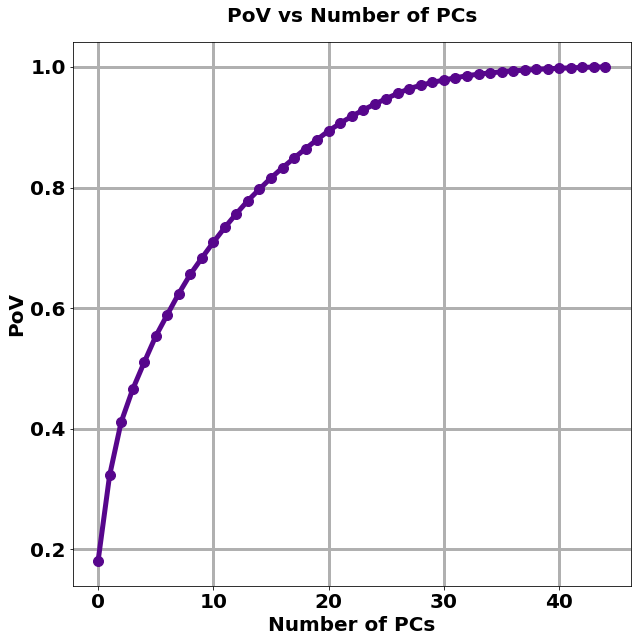

In [13]:
PoV = np.cumsum(pca.singular_values_**2)/np.sum(pca.singular_values_**2)
plt.figure(figsize=(10,10))
plt.plot(PoV,color='#57068c',marker='o',linewidth=5,markersize=10.0)
plt.xlabel('Number of PCs', fontsize=20,fontweight=700)
plt.ylabel('PoV', fontsize=20,fontweight=700)
plt.title('PoV vs Number of PCs',fontsize=20,fontweight=700,pad=20)
plt.grid(True, linestyle='-', linewidth=3)
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=20,fontweight=1000)
plt.savefig("POV.png",dpi='figure',format='png')

We can observe that the data cannot be well defined in smaller Dimensions. We need to consider atleast 25 to 30 PC components to visualize data better, which is out of scope for humans to plot or visualize.

Now, we plot 3 features from our set of 45 features and plot them with the shuffled data. We see that it takes a few minutes to run as we have a large data set of 19000.

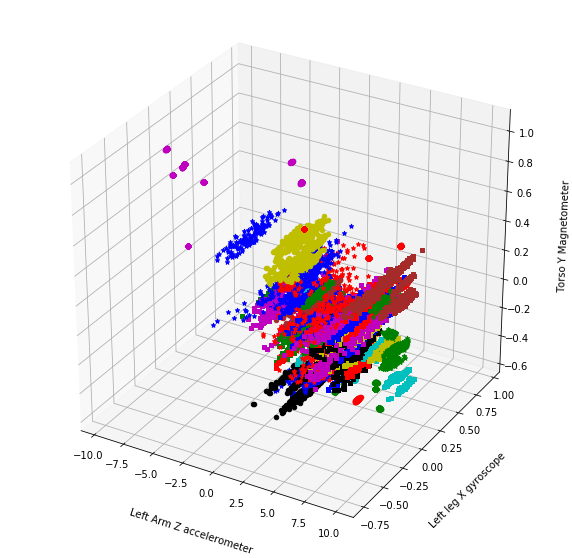

Time elapsed: 70.64211201667786


In [14]:
import time
start=time.time()
data = shuffle(data)
f1 = 'LA_zacc'
f2 = 'LL_xgyro'
f3= 'T_ymag'
markers = ['o','s','*']
colors = ['g','b','r','m','y','k','c','brown']
fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(111,projection='3d')
for i in range(19000):
    x = data[i:i+1][f1]
    y = data[i:i+1][f2]
    z = data[i:i+1][f3]
    activity = int(data[i:i+1]['Activity'])-1
    mk = markers[activity//8]
    co = colors[activity%8]
    ax.scatter(x,y,z,marker=mk,color=co)    
ax.set_xlabel('Left Arm Z accelerometer',labelpad=20)
ax.set_ylabel('Left leg X gyroscope',labelpad=20)
ax.set_zlabel('Torso Y Magnetometer',labelpad=20)
#plt.title('LA_zacc vs LL_xgyro vs T_ymag ', fontsize=35,fontweight=900,pad=30)
plt.grid(True, linestyle='-', linewidth=3)
plt.show()
end=time.time()
print('Time elapsed:',end-start)
fig.savefig("3_d_3_features.png",dpi='figure',format='png')

Now, we take the first 3 PC Components and plot a 3-D graph to show how does the data look in 3-Dimensions. We see that it is very difficult to visualize data in 3- Dimensions. We again see that it takes a few minutes to run as we have a large data set of 19000.

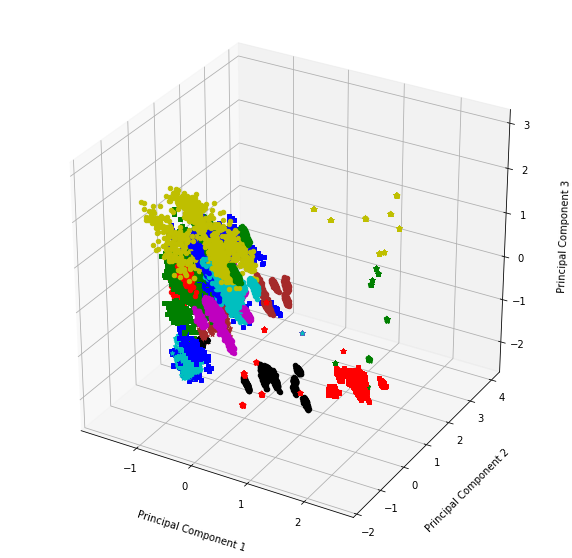

Time elapsed: 57.49826002120972


In [15]:
start=time.time()
Z = Z_new[:,:3]
np.shape(Z)
markers = ['*','o','s']
colors = ['r','b','g','y','m','c','k','brown']
index = np.arange(19000)
ind = shuffle(index)[:19000]
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111,projection='3d')
for i in ind:
    x = Z[i,0]
    y = Z[i,1]
    z = Z[i,2]
    activity = int(Classes_only[i])-1
    mk = markers[activity//8]
    co = colors[activity%8]
    ax.scatter(x,y,z,marker=mk,color=co)
ax.set_xlabel('Principal Component 1',labelpad=20)
ax.set_ylabel('Principal Component 2',labelpad=20)
ax.set_zlabel('Principal Component 3',labelpad=20)
#plt.title('PC1 vs PC2 vs PC3 ', fontsize=35,fontweight=900,pad=30)
plt.grid(True, linestyle='-', linewidth=3)
plt.show()
end=time.time()
print('Time elapsed:',end-start)
fig.savefig("3_PC.png",dpi='figure',format='png')

# Support Vector Machine
Now, We use the Support Vector Classifier and shuffle the data frame and classes vector and divide the data into Training and Test. Also we normalise the data by removing the mean and dividing by the Standard deviation of the training data.

In [16]:
data = shuffle(data)
split=1000
training = data[:split]
test = data[split:]
Xtr1 = training[names]
Xtr = (Xtr1-np.mean(Xtr1,axis=0))/np.std(Xtr1,axis=0)
ytr = training['Activity']
Xts1 = test[names]
Xts = (Xts1-np.mean(Xtr1,axis=0))/np.std(Xtr1,axis=0)
yts = test['Activity']
print('Training Data Dimensions: ',Xtr.shape)
print('Test Data Dimensions: ',Xts.shape)

Training Data Dimensions:  (1000, 45)
Test Data Dimensions:  (18000, 45)


In [17]:
svc = SVC(kernel='linear') 
svc.fit(Xtr,ytr) 
yhat = svc.predict(Xts)
acc = np.sum(yhat==yts)/len(yts) 
print('Accuracy:',acc) 

Accuracy: 0.9716111111111111


We see that we get an accuracy of about 97%. We now print the Confusion Matrix

The confusion Martix: 
 [[953   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0 941   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0 952   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0 944   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0 936   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0  46 907   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0 953   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0 945   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   7   0   0   0   0   0   1 934   0   0   0   0   1   0   0   0   0
    0]
 [  0   2   0   0   0   0   0   0   0 879  53  30   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   1  34 917   1   0   0   0   0   0   0
    0]
 [  0   1   0   0   0   0   0   0   0  36  45 866   0   0   0   0   0   0
    0]
 [  

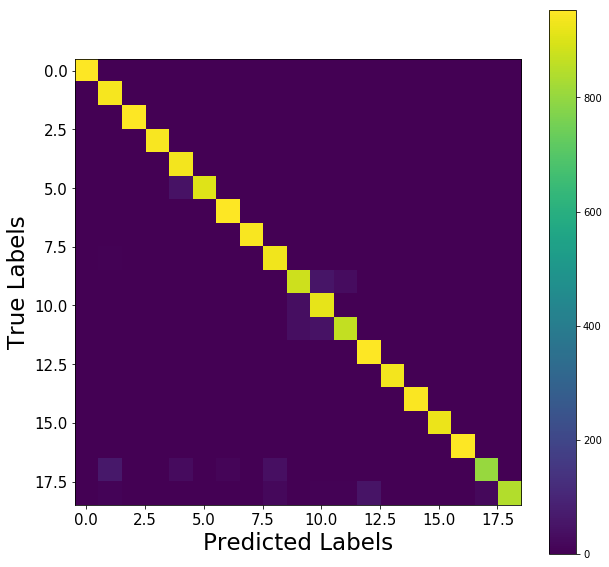

In [18]:
conf = confusion_matrix(yts,yhat) 
print('The confusion Martix: \n',conf) 

plt.figure(figsize=[10,10])
plt.imshow(conf, interpolation='none')
plt.colorbar()
plt.xticks(fontsize=15,fontweight=180)
plt.yticks(fontsize=15,fontweight=180)
plt.xlabel('Predicted Labels',fontsize=23,fontweight=500)
plt.ylabel('True Labels',fontsize=23,fontweight=500)
plt.savefig("Conf_mat_old.png",dpi='figure',format='png')

#### Now, we observe that a lot of class 12 labels were miss-classified as class 10 and class 11. 
It seems that it will the main cause of the error. In order to improve the accuracy further, we will try and combine these classes and then check the accuracy. It should definitely increase from 97%.
### Recall: 
#### Class 10 (A10) is walking on a treadmill with a speed of 4 km/h on a flat surface.

#### Class 11 (A11) is walking on a treadmill with a speed of 4 km/h at 15 deg inclined positions.

#### Class 12 (A12) is running on a treadmill with a speed of 8 km/h. 

We see that these are quite similar activities and we will now try improve the accuracy by combining the 3 classes.
For this, we change the labels of class 11 and 12 to class 10, which will our new label now,representing all the 3 classes.

In [19]:
Classes_comb=Classes_only
for i in range(19000):
    if(Classes_only[i]==11 or Classes_only[i]==12):
        Classes_comb[i]=10
    else:
        Classes_comb[i]=Classes_only[i] 

In [20]:
split=1000
ind = shuffle(np.arange(19000))
tr_ind = ind[:split]
ts_ind = ind[split:]
Xtr1 = data_only[tr_ind]
Xtr = (Xtr1-np.mean(Xtr1,axis=0))/np.std(Xtr1,axis=0)
ytr = Classes_comb[tr_ind]
Xts1 = data_only[ts_ind]
Xts = (Xts1-np.mean(Xtr1,axis=0))/np.std(Xtr1,axis=0)
yts = Classes_comb[ts_ind]
print('Training Data Dimensions: ',Xtr.shape)
print('Test Data Dimensions: ',Xts.shape)

Training Data Dimensions:  (1000, 45)
Test Data Dimensions:  (18000, 45)


In [21]:
svc = SVC(kernel='linear') 
svc.fit(Xtr,ytr) 
yhat = svc.predict(Xts)
acc = np.sum(yhat==yts)/len(yts) 
print('Accuracy:',acc) 

Accuracy: 0.9810555555555556


We see that the accuracy `increased significantly` from 97%.
We now print the confusion matrix of this new data.

The confusion Martix: 
 [[ 929    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0  948    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0  950    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0  945    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0  885   50    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0  953    0    0    0    0    0    0    0    0
     0    1    0]
 [   0    0    0    0    0    0  954    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0  958    0    0    0    0    0    0
     0    0    0]
 [   0   20    0    0    0    0    0    0  923    0    0    0    0    0
     0    6    0]
 [   0    0    0    0    0    0    0    0    0 2834    1    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  951    0    0    0
    

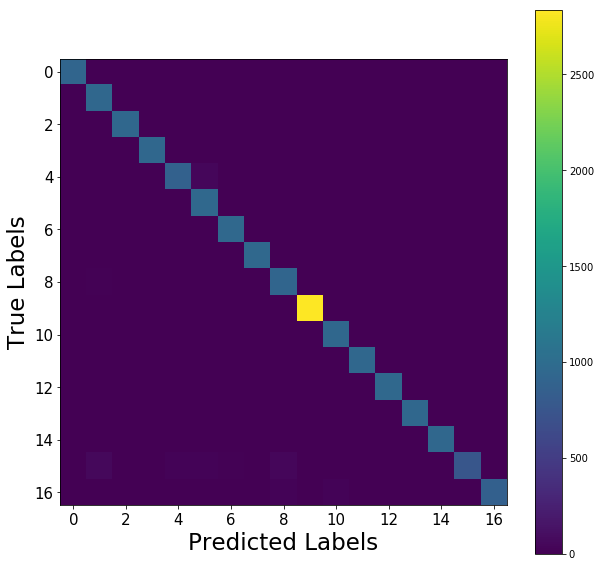

In [22]:
conf = confusion_matrix(yts,yhat) 
print('The confusion Martix: \n',conf) 

plt.figure(figsize=[10,10])
plt.imshow(conf, interpolation='none')
plt.colorbar()
plt.xticks(fontsize=15,fontweight=180)
plt.yticks(fontsize=15,fontweight=180)
plt.xlabel('Predicted Labels',fontsize=23,fontweight=500)
plt.ylabel('True Labels',fontsize=23,fontweight=500)
plt.savefig("Conf2_mat_newdata.png",dpi='figure',format='png')

Now, we will try to plot the accuracy of the fit `for 10 different sizes of the Train and Test data` starting from 1,000 data points for training to 10,000 data points. Observe that, everytime we shuffle the data before splitting it. After splitting the data we normalise the data.

We create the SVM classifer and consecutively fit the data and predict the labels and measure the accuracies for different splits of the data by comparing it with the original labels.

We have used a ' Linear Kernel' for the SVM classfier.


Time elapsed: 12.892515182495117


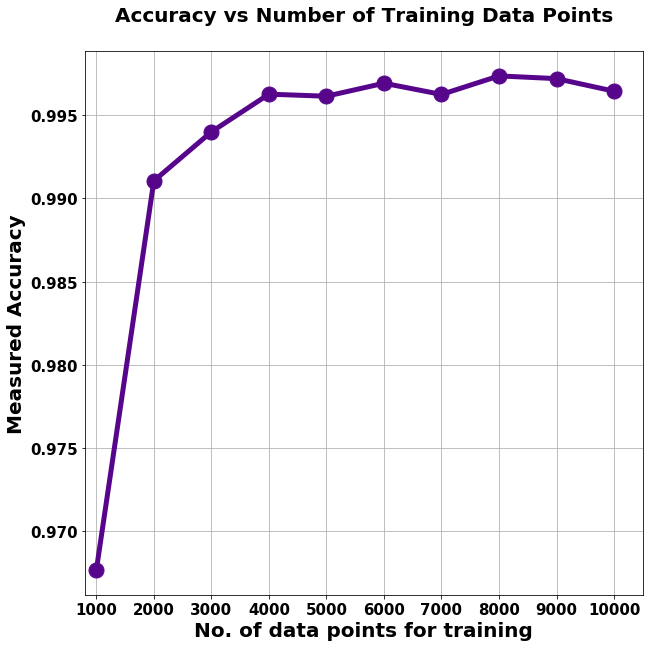

In [30]:
start=time.time()
accuracy = []
split = np.arange(1000,11000,1000)
plt.figure(figsize=[10,10])
for i in range(len(split)):
    data = shuffle(data)
    data.index=range(19000)
    training = data[:split[i]]
    test = data[split[i]:]
    Xtr1 = training[names]
    Xtr = (Xtr1-np.mean(Xtr1,axis=0))/np.std(Xtr1,axis=0)
    ytr = training['Activity']
    Xts1 = test[names]
    Xts = (Xts1-np.mean(Xtr1,axis=0))/np.std(Xtr1,axis=0)
    yts = test['Activity']
    svc = SVC(kernel='linear') 
    svc.fit(Xtr,ytr) 
    yhat = svc.predict(Xts) 
    acc = np.sum(yhat==yts)/len(yts) 
    accuracy.append(acc)
end=time.time()
print('Time elapsed:',end-start)
plt.plot(split,accuracy,color='#57068c',marker='o',linewidth=5,markersize=15.0)
plt.xlabel('No. of data points for training',fontsize=20,fontweight=700)
plt.ylabel('Measured Accuracy',fontsize=20,fontweight=700)
plt.xlim(800,10500)
plt.title('Accuracy vs Number of Training Data Points',fontsize=20,fontweight=700,pad=30)
plt.grid(True)
plt.xticks(np.arange(1000,11000,1000),fontsize=15,fontweight=700)
plt.yticks(fontsize=15,fontweight=700)
plt.savefig("SVM.png",format='png',dpi='figure')

# GridSearchCV

We finally try to find the optimal value of C and Gamma for SVC using GridSearchCV on our dataset. 
We tried to implement on the whole data of 19000 points, but it requires a lot of time. So, we have implemented it on a part of our data just to save on training time.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
svc = SVC(kernel='rbf')
pipe = Pipeline(steps=[('scaler', scaler),('svc', svc)])

We are using the following values of C: 
`1e-3, 1e-2 ,1e-1 ,1e0 ,1e1 `
and for Gamma:
`1e-2, 1e-1, 1e0, 1e1 `  

In [25]:
powers1=np.arange(-3,2)
c_test = pow(10.0,powers1)
powers2=np.arange(-2,2)
gam_test = pow(10.0,powers2)

In [26]:
params = {'svc__C' : c_test,'svc__gamma':gam_test}

We will be shuffling the data and be using the first 10,000 data points.

In [27]:
start=time.time()
estimator = GridSearchCV(pipe,params,cv=5, return_train_score=True, iid=False)
ind = shuffle(np.arange(19000))
ind_gs = ind[:10000]
estimator.fit(data_only[ind_gs],Classes_only[ind_gs])
end=time.time()
print('Time elapsed:',end-start)

Time elapsed: 1050.5890669822693


Now, we print the Best Score and the Best Parameter.

In [49]:
print('Best Score:',estimator.best_score_)
print('Best Parameter:',estimator.best_params_)
test_score = estimator.cv_results_['mean_test_score']

Best Score: 0.9966023874032134
Best Parameter: {'svc__C': 10.0, 'svc__gamma': 0.01}


We see that for `C=10` and `Gamma =1e-2` we can get score of around `99.7%`!

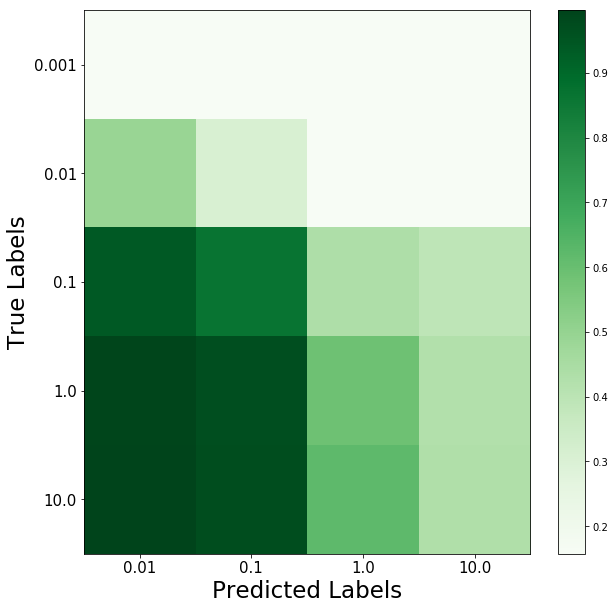

In [55]:
test_score = estimator.cv_results_['mean_test_score']
test_score.shape
plt.figure(figsize=[10,10])
plt.imshow(test_score.reshape(5,4), aspect='auto', cmap='Greens')
plt.ylabel('C')
plt.xlabel('Gamma')
plt.colorbar()

ax = plt.gca()
ax.set_yticks(np.arange(len(c_test)))
ax.set_yticklabels(c_test)
ax.set_xticks(np.arange(len(gam_test)))
ax.set_xticklabels(gam_test)

plt.xticks(fontsize=15,fontweight=180)
plt.yticks(fontsize=15,fontweight=180)
plt.xlabel('Predicted Labels',fontsize=23,fontweight=500)
plt.ylabel('True Labels',fontsize=23,fontweight=500)
plt.savefig("Conf.last.png",dpi='figure',format='png')